Processing and training MLR for Dataset 1...
MAE: 0.0270, MSE: 0.0017, MAPE: 103.09%, R²: 0.9694


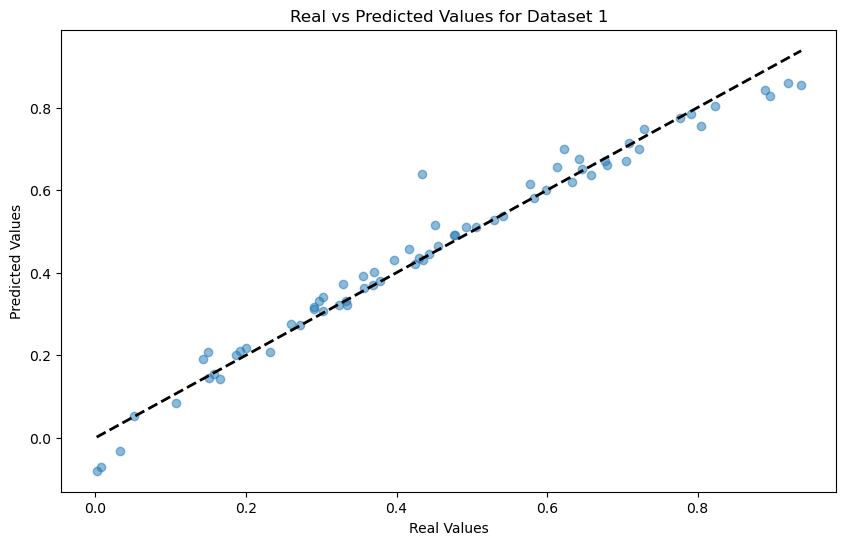

Processing and training MLR for Dataset 2...
MAE: 0.0311, MSE: 0.0014, MAPE: 10.19%, R²: 0.9736


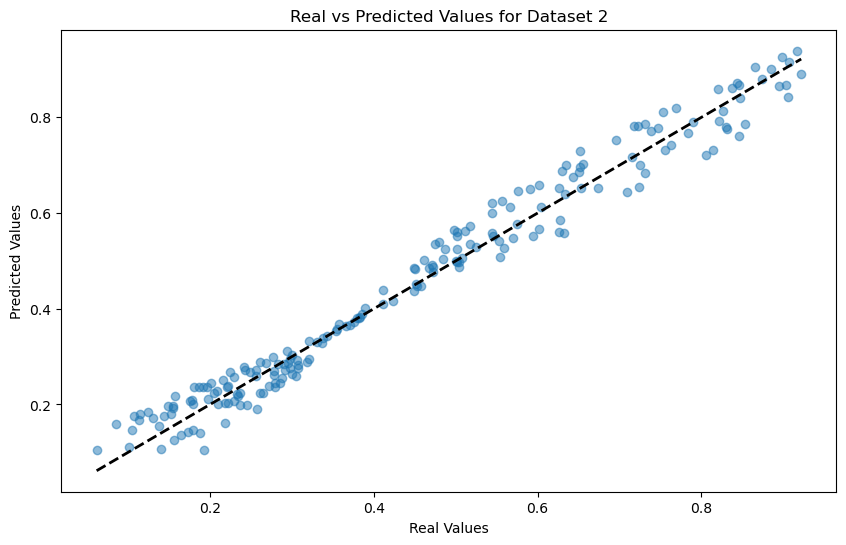

Processing and training MLR for Dataset 3...
MAE: 0.0493, MSE: 0.0045, MAPE: 27.27%, R²: 0.6745


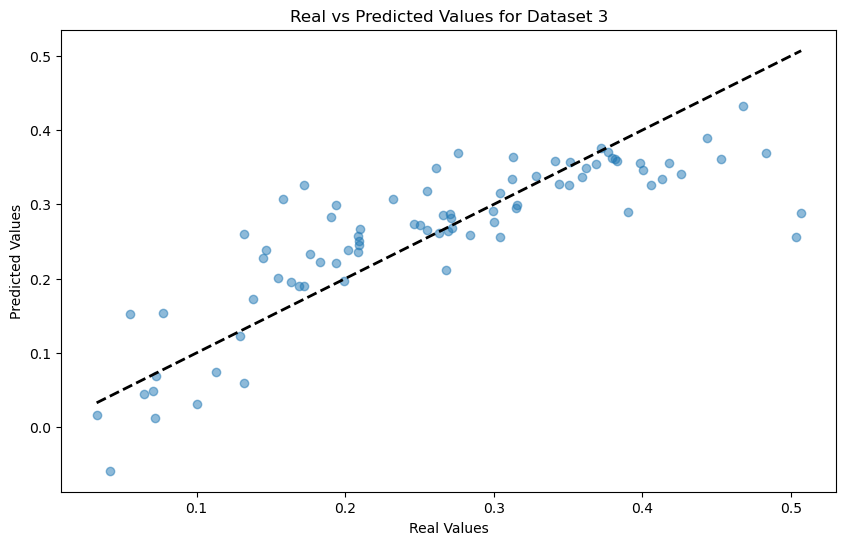

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_mape(y_true, y_pred):
    # Ensure both are 1-dimensional
    y_true, y_pred = np.array(y_true).flatten(), np.array(y_pred).flatten()
    # Calculate MAPE for non-zero true values
    non_zero = y_true != 0
    mape = np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100
    return mape

# Function to process data and train the multiple linear regression model
def process_and_train_mlr(dataset, input_columns, output_column, test_size):
    # Extract input and output data
    X = dataset[input_columns]
    y = dataset[output_column].values.reshape(-1, 1)
    
    # Scale input data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
    
    # Define the multiple linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    predictions = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = calculate_mape(y_test, predictions)
    
    r2 = r2_score(y_test, predictions)  # Calculate R-squared
    
    # Print evaluation metrics
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.2f}%, R²: {r2:.4f}")
    
    # Return testing data, true labels, and predictions
    return X_test, y_test, predictions

def plot_real_vs_predicted(y_real, y_predicted, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_real, y_predicted, alpha=0.5)
    plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=2)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Real vs Predicted Values for {dataset_name}')
    plt.show()

dataset1 = pd.read_csv('normalized_dataset1.csv')
dataset2 = pd.read_csv('normalized_dataset2.csv')
dataset3 = pd.read_csv('normalized_dataset3.csv')

architecture_params = {
    'Dataset 1': {'dataset': dataset1, 'input_columns': dataset1.columns[:-1].tolist(), 'output_column': dataset1.columns[-1], 'test_size': 0.15},
    'Dataset 2': {'dataset': dataset2, 'input_columns': dataset2.columns[:-1].tolist(), 'output_column': dataset2.columns[-1], 'test_size': 0.20},
    'Dataset 3': {'dataset': dataset3, 'input_columns': dataset3.columns[:-1].tolist(), 'output_column': dataset3.columns[-1], 'test_size': 0.20}
}

for dataset_name, params in architecture_params.items():
    print(f"Processing and training MLR for {dataset_name}...")
    X_test, y_test, predictions = process_and_train_mlr(params['dataset'], params['input_columns'], params['output_column'], params['test_size'])
    plot_real_vs_predicted(y_test, predictions, dataset_name)
